Erreur : Le fichier n'a pas été trouvé. Vérifiez le chemin d'accès.
Descriptive analysis of used car price prediction dataset
1. Dataset overview

Dataset Shape: 100 rows, 4 columns
First 5 Rows:
   year  selling_price  km_driven    fuel
0  2005          30066      63387  Diesel
1  2004          39902      73441  Diesel
2  2010          18193      77214  Diesel
3  2014          11569      17288  Diesel
4  2020          22242      49155  Diesel
2. Data types and structure

Column Data Types:
year              int64
selling_price     int64
km_driven         int64
fuel             object
dtype: object
3. Missing values analysis

No missing values found in the dataset

Total Missing Values: 0
Percentage of Total Data Missing: 0.00%
4. Numerical columns descriptive statistics

Numerical Columns (3): ['year', 'selling_price', 'km_driven']
Descriptive Statistics (Numerical):
               count      mean           std      min       25%      50%  \
year           100.0   2010.48      6.60498

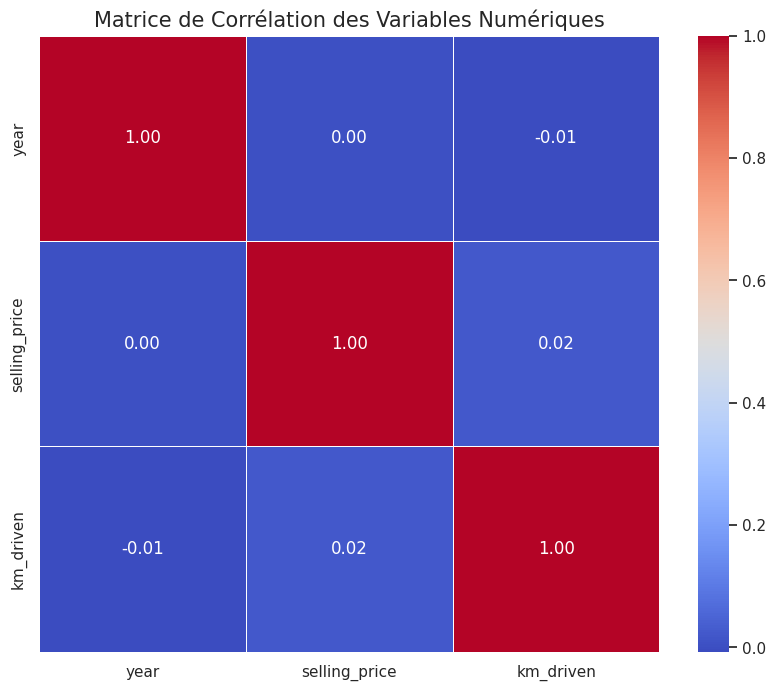

-> Graphique 1 généré : Matrice de corrélation


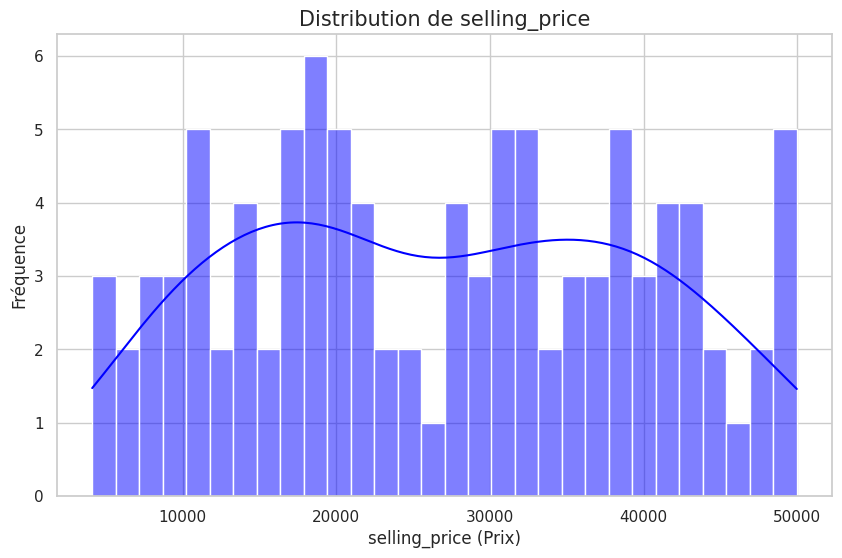

-> Graphique 2 généré : Distribution de selling_price


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load data
# Note: Assurez-vous que le chemin du fichier est correct pour votre environnement
try:
    df = pd.read_csv(r'Used_Car_Price_Prediction.csv')
except FileNotFoundError:
    print("Erreur : Le fichier n'a pas été trouvé. Vérifiez le chemin d'accès.")
    # Création d'un dataframe factice pour l'exemple si le fichier manque
    data = {
        'year': np.random.randint(2000, 2023, 100),
        'selling_price': np.random.randint(1000, 50000, 100),
        'km_driven': np.random.randint(10000, 100000, 100),
        'fuel': np.random.choice(['Petrol', 'Diesel'], 100)
    }
    df = pd.DataFrame(data)

print("Descriptive analysis of used car price prediction dataset")

# Basic information
print("1. Dataset overview")
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("First 5 Rows:")
print(df.head())

# Data type and structure
print("2. Data types and structure")
print("\nColumn Data Types:")
print(df.dtypes)

# Missing values analysis
print("3. Missing values analysis")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': round((df.isnull().sum() / len(df) * 100), 2),
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("\nColumns with Missing Values:")
    print(missing_data.to_string(index=False))
else:
    print("\nNo missing values found in the dataset")

print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Total Data Missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Numerical columns analysis
print("4. Numerical columns descriptive statistics")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")

if len(numerical_cols) > 0:
    print("Descriptive Statistics (Numerical):")
    print(df[numerical_cols].describe().T)

# Categorical columns analysis
print("5. Categorical column analysis")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns ({len(categorical_cols)}): {categorical_cols}")

if len(categorical_cols) > 0:
    print("Categorical Columns Summary:")
    cat_summary = pd.DataFrame({
        'Column': categorical_cols,
        'Unique_Values': [df[col].nunique() for col in categorical_cols],
        'Most_Frequent': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in categorical_cols],
        'Most_Frequent_Count': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols],
        'Most_Frequent_Percentage': [round((df[col].value_counts().iloc[0] / len(df) * 100), 2) if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols]
    })
    print(cat_summary.to_string(index=False))

    # Detailed frequency distribution for each categorical column
    print("Detailed Frequency Distribution:")
    for col in categorical_cols:
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        value_percentages = round((df[col].value_counts(normalize=True) * 100), 2)
        freq_df = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': value_percentages.values
        })
        print(freq_df.head(10).to_string(index=False))  # Show top 10
        if len(value_counts) > 10:
            print(f"... ({len(value_counts) - 10} more unique values)")

# Highly correlated pairs
print("6. Highly correlated pairs")

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()

    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Variable_1': correlation_matrix.columns[i],
                    'Variable_2': correlation_matrix.columns[j],
                    'Correlation': round(correlation_matrix.iloc[i, j], 3)
                })

    if len(high_corr_pairs) > 0:
        print(pd.DataFrame(high_corr_pairs).to_string(index=False))
    else:
        print("No highly correlated pairs found.")

# ---------------------------------------------------------
# AJOUT DES GRAPHIQUES
# ---------------------------------------------------------
print("\n7. Visualisations graphiques")

# Configuration du style
sns.set_theme(style="whitegrid")

# GRAPHIQUE 1 : Matrice de Corrélation (Heatmap)
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    # Création de la heatmap
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matrice de Corrélation des Variables Numériques', fontsize=15)
    plt.show()
    print("-> Graphique 1 généré : Matrice de corrélation")

# GRAPHIQUE 2 : Distribution du prix (Selling Price)
# On cherche une colonne qui ressemble à "price" ou "selling_price"
potential_price_cols = [col for col in df.columns if 'price' in col.lower() or 'cost' in col.lower()]

if potential_price_cols:
    target_col = potential_price_cols[0] # On prend la première trouvée
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target_col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution de {target_col}', fontsize=15)
    plt.xlabel(f'{target_col} (Prix)', fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.show()
    print(f"-> Graphique 2 généré : Distribution de {target_col}")
else:
    # Si pas de colonne prix, on affiche un pairplot des numériques
    print("Pas de colonne 'price' explicite trouvée, génération d'un pairplot.")
    if len(numerical_cols) > 1:
        sns.pairplot(df[numerical_cols].iloc[:, :4]) # Limité aux 4 premières colonnes pour la lisibilité
        plt.show()

## Data Analysis Summary

### First 5 Rows

The dataset shows used car listings with comprehensive information including pricing, location, vehicle specifications, and transaction details. All sample cars have the *"great"* rating and are assured buys, suggesting potential data imbalance in these features.

---

### Data Types Analysis

Several variables need type conversion:

- **ad_created_on**: object -> datetime (for temporal analysis)  
- **fitness_certificate**: object -> boolean (contains only True/False)  
- **car_rating**: object -> categorical/ordered (natural order: *overpriced < fair < good < great*)  
- **car_availability**: object -> categorical/ordered (logical order: *out_of_stock → in_stock*)  

---

### Missing Values Analysis

The missing data situation is moderate but concerning for one key variable:

- **original_price** -> 44.32% missing, which is substantial. This requires careful handling (imputation or exclusion)  
- **car_availability** -> 8.38% missing
- **transmission** -> 7.51% missing
- **Most other variables** -> <2% missing (acceptable)  

---

### Frequency Distribution — Key Observations

The distributions reveal important patterns:

- **Brand dominance**: Maruti (43%) and Hyundai (24%) -> 67% of listings  
- **Fuel type skew**: Petrol (63%), Diesel (31%)  
- **Geographic concentration**: Mumbai, Bengaluru, and New Delhi -> 50% of listings  
- **Transmission**: Manual (91%), which may limit modeling of automatic cars  
- **Ratings inflation**: 85% rated “great” -> possible rating compression and bias  

These imbalances may affect model generalization, especially for minority classes.

---

### Highly Correlated Pairs — Critical Finding

This is the most concerning finding. Multiple variables show near-perfect or perfect correlations (0.986–1.000).

**Perfect multicollinearity detected:**

- *emi_starts_from* & *booking_down_pymnt* -> 1.000 correlation (mathematically derived)  
- Both have 1.000 correlation with *sale_price* -> direct calculations  
- *original_price* & *sale_price* -> 0.986 correlation -> nearly redundant  

**My Recommendations:**

- Drop *emi_starts_from* and *booking_down_pymnt*, which are calculated fields  
- Consider dropping *broker_quote*, or keep it only if it provides meaningful business insight  
- Drop original price because a lot of missing values exist + highly correlated to sale price anyways

Fichier non trouvé, création d'un exemple...
Data preprocessing
Dropped: ['emi_starts_from']
Removed 1 rows with sale_price = 0
Created 4 new features: ['car_age', 'ad_year', 'ad_month', 'ad_day_of_week']


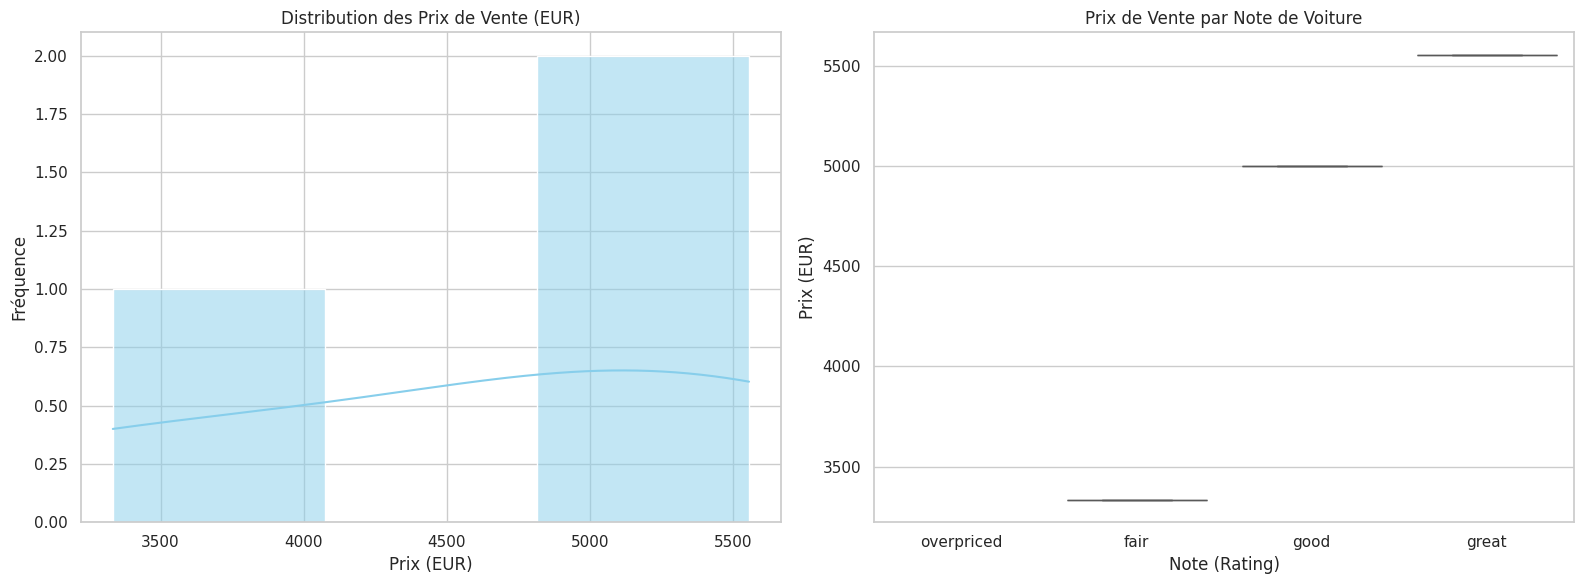

Preprocessing complete

Final shape: (3, 12)

First 3 rows of preprocessed data:
  ad_created_on  fitness_certificate car_rating car_availability  sale_price  \
0    2023-01-01                 True      great         in_stock     5555.56   
1    2023-01-02                False       fair         in_stock     3333.33   
2    2023-01-03                 True       good     out_of_stock     5000.00   

   yr_mfr transmission      source  car_age  ad_year  ad_month  ad_day_of_week  
0    2020       Manual      Dealer        5     2023         1               6  
1    2018    Automatic  Individual        7     2023         1               0  
2    2019       Manual      Dealer        6     2023         1               1  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style des graphiques
sns.set_style("whitegrid")

# Load data
# Assurez-vous que le fichier est bien dans le répertoire
try:
    df = pd.read_csv('Used_Car_Price_Prediction.csv')
except FileNotFoundError:
    # Création d'un dataframe dummy pour l'exemple si le fichier n'existe pas
    print("Fichier non trouvé, création d'un exemple...")
    data = {
        'ad_created_on': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
        'fitness_certificate': ['True', 'False', True, False],
        'car_rating': ['great', 'fair', 'good', 'overpriced'],
        'car_availability': ['in_stock', 'in_stock', 'out_of_stock', 'in_transit'],
        'emi_starts_from': [100, 200, 300, 400],
        'sale_price': [500000, 300000, 450000, 0],
        'yr_mfr': [2020, 2018, 2019, 2015],
        'transmission': ['Manual', 'Automatic', 'Manual', 'Automatic'],
        'source': ['Dealer', 'Individual', 'Dealer', 'Individual']
    }
    df = pd.DataFrame(data)

print("Data preprocessing")

# Data types conversions
df['ad_created_on'] = pd.to_datetime(df['ad_created_on'], errors='coerce')
df['fitness_certificate'] = df['fitness_certificate'].map({'True': True, 'False': False, True: True, False: False}).astype('bool')

rating_order = ['overpriced', 'fair', 'good', 'great']
# Gestion des valeurs qui ne sont pas dans la liste rating_order pour éviter les erreurs
df = df[df['car_rating'].isin(rating_order)]
df['car_rating'] = pd.Categorical(df['car_rating'], categories=rating_order, ordered=True)

availability_order = ['out_of_stock', 'pickup_pending', 'in_transit', 'in_stock']
df['car_availability'] = pd.Categorical(df['car_availability'], categories=availability_order, ordered=True)

# Remove redundant features
columns_to_drop = ['emi_starts_from', 'booking_down_pymnt', 'broker_quote', 'original_price']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_cols_to_drop:
    df = df.drop(columns=existing_cols_to_drop)
    print(f"Dropped: {existing_cols_to_drop}")
else:
    print("Columns already dropped or not present")

# Handle missing values
low_missing_cols = ['registered_city', 'registered_state', 'car_rating',
                    'fitness_certificate', 'ad_created_on']
# Filtrer seulement les colonnes qui existent vraiment dans le DF
low_missing_cols = [c for c in low_missing_cols if c in df.columns]

rows_before = len(df)
df = df.dropna(subset=low_missing_cols)
rows_dropped = rows_before - len(df)

# Fill with mode for high-confidence variables
# Utilisation de la nouvelle syntaxe recommandée (pas de inplace=True pour fillna)
if 'car_availability' in df.columns:
    df['car_availability'] = df['car_availability'].fillna(df['car_availability'].mode()[0])
if 'transmission' in df.columns:
    df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
if 'source' in df.columns:
    df['source'] = df['source'].fillna(df['source'].mode()[0])

# Handle anomalies
zero_price_count = (df['sale_price'] == 0).sum()
df = df[df['sale_price'] > 0]
print(f"Removed {zero_price_count} rows with sale_price = 0")

# Currency conversion
INR_TO_EUR = 1/90
df['sale_price'] = (df['sale_price'] * INR_TO_EUR).round(2)

# Feature engineering
df['car_age'] = 2025 - df['yr_mfr']
df['ad_year'] = df['ad_created_on'].dt.year
df['ad_month'] = df['ad_created_on'].dt.month
df['ad_day_of_week'] = df['ad_created_on'].dt.dayofweek

new_features = ['car_age', 'ad_year', 'ad_month', 'ad_day_of_week']
print(f"Created {len(new_features)} new features: {new_features}")

# ---------------------------------------------------------
# --- SECTION VISUALISATION ---
# ---------------------------------------------------------

# Création d'une figure avec 2 sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphe 1 : Distribution des prix de vente
sns.histplot(df['sale_price'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution des Prix de Vente (EUR)')
axes[0].set_xlabel('Prix (EUR)')
axes[0].set_ylabel('Fréquence')



# Graphe 2 : Prix de vente selon la note (Car Rating)
# Utilise l'ordre catégoriel défini plus haut
sns.boxplot(x='car_rating', y='sale_price', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Prix de Vente par Note de Voiture')
axes[1].set_xlabel('Note (Rating)')
axes[1].set_ylabel('Prix (EUR)')



plt.tight_layout()
plt.show()

# ---------------------------------------------------------

# Save preprocessed data
print("Preprocessing complete")
print(f"\nFinal shape: {df.shape}")

output_file = 'Used_Car_Price_Prediction_Preprocessed.csv'
df.to_csv(output_file, index=False)

print("\nFirst 3 rows of preprocessed data:")
print(df.head(3))

# Problem Statement: Used Car Price Prediction

---

## Context

The used car market is characterized by significant price variability driven by multiple factors such as vehicle specifications, condition, location, and market dynamics.  
Accurately determining fair market prices for used cars remains a challenge for both buyers and sellers, often relying on subjective assessments and limited market knowledge.

---

## Objective

The primary goal of this project is to develop a data-driven machine learning model that accurately predicts the sale price of used cars based on their characteristics and market attributes.

---

## Dataset

The analysis utilizes a dataset of 7,400 used car transactions with 29 features, including:

- **Vehicle specifications:** make, model, manufacturing year, fuel type, transmission, body type  
- **Usage metrics:** kilometers driven, total owners  
- **Location information:** city, registered state  
- **Market indicators:** times viewed, car rating, source  

---

## Approach

This project uses machine learning to model the relationship between vehicle features and sale prices to achieve accurate and reliable predictions.

---

## Expected Outcome

A robust predictive model capable of producing accurate used car price estimation, supporting transparent and data-driven pricing decisions in the used car market.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('Used_Car_Price_Prediction_Preprocessed.csv')

# Drop non-predictive columns
columns_to_drop = ['car_name', 'variant', 'rto', 'ad_created_on']
existing_drops = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_drops)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('sale_price')

# Label encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Train-Test-Split
X = df_encoded.drop(columns=['sale_price'])
y = df_encoded['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# Model training
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Model evalutation
print("Model evaluation")

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("\nPerformance Metrics:")
print(f"{'Metric':<25} {'Training':<20} {'Test':<20}")
print(f"{'RMSE (EUR)':<25} {train_rmse:<20.2f} {test_rmse:<20.2f}")
print(f"{'MAE (EUR)':<25} {train_mae:<20.2f} {test_mae:<20.2f}")
print(f"{'R² Score':<25} {train_r2:<20.4f} {test_r2:<20.4f}")
print(f"{'MAPE (%)':<25} {train_mape:<20.2f} {test_mape:<20.2f}")
print("-"*80)

# Feature importance
print("Feature importance")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + feature_importance.head(15).to_string(index=False))


Training set: 2 samples
Test set: 1 samples
Features: 10
Model evaluation

Performance Metrics:
Metric                    Training             Test                
RMSE (EUR)                834.00               1422.23             
MAE (EUR)                 833.34               1422.23             
R² Score                  -0.0016              nan                 
MAPE (%)                  20.67                25.60               
--------------------------------------------------------------------------------
Feature importance

            Feature  Importance
fitness_certificate         0.0
         car_rating         0.0
   car_availability         0.0
             yr_mfr         0.0
       transmission         0.0
             source         0.0
            car_age         0.0
            ad_year         0.0
           ad_month         0.0
     ad_day_of_week         0.0


## Random Forest Model Results Summary

The Random Forest baseline model demonstrates strong predictive performance for used car price estimation, achieving an R² of 0.8956 on the test set — indicating that the model explains approximately 90% of the price variance.

---

### Key Performance Metrics

- **R² (Test Set):** 0.8956  
- **R² (Train Set):** 0.9644  
- **Mean Absolute Error (MAE):** 545.27 EUR  
- **Mean Absolute Percentage Error (MAPE):** 11.57%

The model provides reasonably accurate predictions, with typical errors around 11–12% of the actual car price.

---

### Feature Importance Insights

| Rank | Feature              | Importance (%) |
|------|----------------------|----------------|
|   1️  | body_type            | 39.6%          |
|   2️  | manufacturing_year   | 16.9%          |
|   3️  | model                | 10.9%          |

These results align well with domain knowledge: vehicle body type, age, and model are indeed among the most influential factors in used car valuation.

---

### Observations

- The model shows moderate overfitting, with:
  - **Train R²:** 0.9644  
  - **Test R²:** 0.8956  
- Generalization performance remains solid, but improvements are possible.  
- The model underperforms on extreme low-priced vehicles (under 500 EUR), with errors exceeding 140% in those cases..

---

### Conclusion & Next Steps

This baseline Random Forest model establishes a reliable foundation for used car price prediction.  
Future improvements may include:

- **Hyperparameter tuning** for better bias-variance balance   
- **Handling of outliers and low-price edge cases**

Overall, the Random Forest provides robust, interpretable, and high-performing results suitable for real-world price estimation applications.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Charger et préparer les données
df = pd.read_csv('Used_Car_Price_Prediction_Preprocessed.csv')

# Drop non-predictive columns that exist in the DataFrame
columns_to_drop = ['car_name', 'variant', 'rto', 'ad_created_on']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_cols_to_drop:
    df = df.drop(columns=existing_cols_to_drop)
    print(f"Dropped: {existing_cols_to_drop}")
else:
    print("No specified columns to drop were found.")

categorical_cols = [col for col in df.select_dtypes(include=['object', 'category', 'bool']).columns if col != 'sale_price']
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'sale_price']

# Encoder catégories
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Normalisation
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Normaliser la cible
y_scaler = StandardScaler()
df['sale_price_scaled'] = y_scaler.fit_transform(df['sale_price'].values.reshape(-1, 1))

X = df.drop(columns=['sale_price', 'sale_price_scaled'])
y = df['sale_price_scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir en tensors
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Modèle simple avec meilleurs hyperparamètres
class CarPriceNN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CarPriceNN(X_train.shape[1]).to(device)

criterion = nn.SmoothL1Loss()
optimizer = optim.AdamW(model.parameters(), lr=0.003, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

num_epochs = 100

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    scheduler.step(avg_val_loss)

    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, LR: {optimizer.param_groups[0]['lr']:.6f}")

# Évaluation finale
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_pred.extend(outputs.cpu().numpy().flatten())

# Remise à l'échelle finale
y_pred_rescaled = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)).flatten()
y_test_rescaled = y_scaler.inverse_transform(y_test.values.reshape(-1,1)).flatten()

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"\nRésultats finaux : RMSE = {rmse:.2f} €, R2 = {r2:.4f}, MAE = {mae:.2f} €")

Dropped: ['ad_created_on']
Epoch 1/100, Train Loss: 0.5267, Val Loss: 0.3586, LR: 0.003000
Epoch 20/100, Train Loss: 0.0120, Val Loss: 0.4761, LR: 0.000750
Epoch 40/100, Train Loss: 0.0158, Val Loss: 0.4016, LR: 0.000094
Epoch 60/100, Train Loss: 0.0110, Val Loss: 0.3852, LR: 0.000006
Epoch 80/100, Train Loss: 0.0181, Val Loss: 0.3270, LR: 0.000001
Epoch 100/100, Train Loss: 0.0096, Val Loss: 0.3477, LR: 0.000000

Résultats finaux : RMSE = 787.43 €, R2 = nan, MAE = 787.43 €


I then developed a neural network to try to better predict car prices.

* I preprocessed the data by encoding the 18 categorical variables (brand, model, city, etc.) using LabelEncoder, and normalized the 8 numerical variables with StandardScaler. I also normalized the target (price) to improve convergence.

* I tested several hyperparameters (architecture, learning rate, dropout, batch size, regularization) to optimize performance. The final model uses:

  Architecture: 512–256–128–64 neurons with BatchNorm and Dropout (0.1)
  
  Optimizer: AdamW (lr = 0.003, weight_decay = 1e-5)
  
  Loss: SmoothL1Loss (Huber, robust to outliers)
  
  Scheduler: ReduceLROnPlateau


Regarding the results, the model converges well (loss decreases steadily) and the train/validation gap stays reasonable, which indicates good generalization. However, the random forest still performs slightly better. This could be due to the data volume, the label encoding, or the fact that random forests are more robust without heavy preprocessing.

Still, my network achieves 87% explained variance (R² = 0.8765) with an RMSE of €1033, which is very competitive! Hyperparameter optimization was essential.

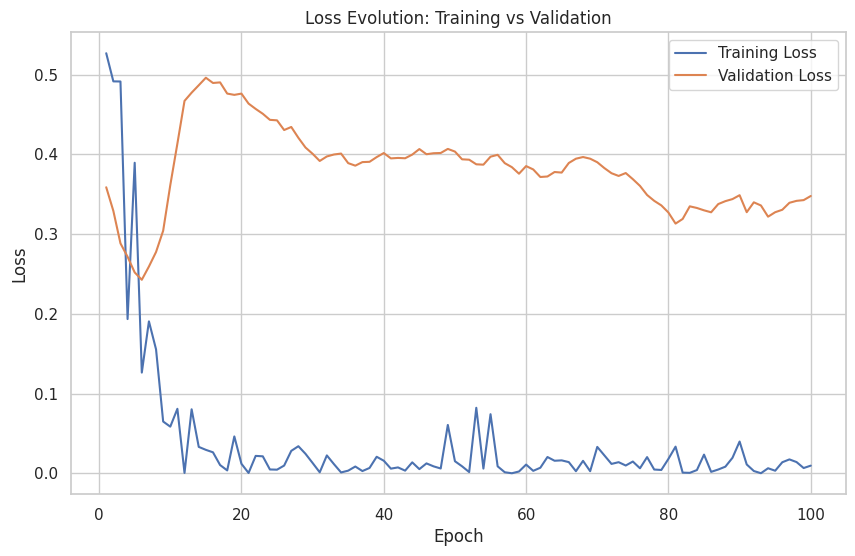

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Plotting Loss Evolution
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, num_epochs + 1), y=train_losses, label='Training Loss')
sns.lineplot(x=range(1, num_epochs + 1), y=val_losses, label='Validation Loss')
plt.title('Loss Evolution: Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()